### I will be analyzing Lover by Taylor Swift, and Lust For Life by Lana Del Rey. I chose both of these albums because I am a big fan of both of these artists, and these albums are upon my favorites of the discography. I like Lover because it has a nice vibe, and the songs are very fun. It also represents what love feels like in a very vulnerable way. I chose Lust For Life because I also like the vibes of it, and it has a very easygoing feel. I really like the aesthetic, as well as the diversity of the album. There are songs of all different genres on this album, which makes it more engaging. 

In [37]:
from matplotlib import pyplot as plt
import pandas as pd
import base64
import requests
import urllib
import json

In [38]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data, headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [39]:
keys = pd.read_csv("keys.txt")

In [40]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])

200


In [41]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'
audio_features = 'https://api.spotify.com/v1/albums/{}/tracks'

In [42]:
def api_call(endpoint_url, api_header):
      response = requests.get(endpoint_url, headers = api_header)
      print(response.status_code)
      return response.json()

In [43]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [44]:
lover_album_id = '1NAmidJlEaVgA3MpcPFYGq'
lfl_album_id = '7xYiTrbTL57QO0bb4hXIKo'

In [45]:
lover_album_response = api_call(ab_tracks_ep.format(lover_album_id), session_header)
lfl_album_response = api_call(ab_tracks_ep.format(lfl_album_id), session_header)

200
200


In [46]:
lover_album_df = pd.DataFrame(lover_album_response['items'])
lfl_album_df = pd.DataFrame(lfl_album_response['items'])

In [47]:
lover_track_ids = ','.join(lover_album_df['id'].to_list())
lfl_track_ids = ','.join(lfl_album_df['id'].to_list())

In [48]:
lover_track_features = api_call(t_features_ep + '?market=US&ids={}'.format(lover_track_ids), session_header)
lfl_track_features = api_call(t_features_ep + '?market=US&ids={}'.format(lfl_track_ids), session_header)

200
200


In [49]:
lover_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(lover_track_ids), session_header)
lfl_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(lfl_track_ids), session_header)

200
200


In [50]:
lover_features_df = pd.DataFrame(lover_track_features['audio_features'])
lfl_features_df = pd.DataFrame(lfl_track_features['audio_features'])

In [51]:
lover_tracks_df = pd.DataFrame(lover_track_info['tracks'])
lfl_tracks_df = pd.DataFrame(lfl_track_info['tracks'])
lover_tracks_df

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,170640,False,{'isrc': 'USUG11901471'},{'spotify': 'https://open.spotify.com/track/43...,https://api.spotify.com/v1/tracks/43rA71bccXFG...,43rA71bccXFGD4C8GOpIlN,False,True,I Forgot That You Existed,68,None,1,track,spotify:track:43rA71bccXFGD4C8GOpIlN
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,178426,False,{'isrc': 'USUG11901472'},{'spotify': 'https://open.spotify.com/track/1B...,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,1BxfuPKGuaTgP7aM0Bbdwr,False,True,Cruel Summer,89,None,2,track,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,221306,False,{'isrc': 'USUG11901473'},{'spotify': 'https://open.spotify.com/track/1d...,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,1dGr1c8CrMLDpV6mPbImSI,False,True,Lover,84,None,3,track,spotify:track:1dGr1c8CrMLDpV6mPbImSI
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,190360,False,{'isrc': 'USUG11901474'},{'spotify': 'https://open.spotify.com/track/3R...,https://api.spotify.com/v1/tracks/3RauEVgRgj1I...,3RauEVgRgj1IuWdJ9fDs70,False,True,The Man,79,None,4,track,spotify:track:3RauEVgRgj1IuWdJ9fDs70
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,211240,False,{'isrc': 'USUG11901475'},{'spotify': 'https://open.spotify.com/track/3p...,https://api.spotify.com/v1/tracks/3pHkh7d0lzM2...,3pHkh7d0lzM2AldUtz2x37,False,True,The Archer,73,None,5,track,spotify:track:3pHkh7d0lzM2AldUtz2x37
5,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,173386,False,{'isrc': 'USUG11901476'},{'spotify': 'https://open.spotify.com/track/2Y...,https://api.spotify.com/v1/tracks/2YWtcWi3a83p...,2YWtcWi3a83pdEg3Gif4Pd,False,True,I Think He Knows,69,None,6,track,spotify:track:2YWtcWi3a83pdEg3Gif4Pd
6,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,234146,False,{'isrc': 'USUG11901477'},{'spotify': 'https://open.spotify.com/track/21...,https://api.spotify.com/v1/tracks/214nt20w5wOx...,214nt20w5wOxJnY462klLw,False,True,Miss Americana & The Heartbreak Prince,75,None,7,track,spotify:track:214nt20w5wOxJnY462klLw
7,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,222400,False,{'isrc': 'USUG11901478'},{'spotify': 'https://open.spotify.com/track/4y...,https://api.spotify.com/v1/tracks/4y5bvROuBDPr...,4y5bvROuBDPr5fuwXbIBZR,False,True,Paper Rings,75,None,8,track,spotify:track:4y5bvROuBDPr5fuwXbIBZR
8,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,287266,False,{'isrc': 'USUG11901479'},{'spotify': 'https://open.spotify.com/track/12...,https://api.spotify.com/v1/tracks/12M5uqx0Zuwk...,12M5uqx0ZuwkpLp5rJim1a,False,True,Cornelia Street,72,None,9,track,spotify:track:12M5uqx0ZuwkpLp5rJim1a
9,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,1,198533,False,{'isrc': 'USUG11901480'},{'spotify': 'https://open.spotify.com/track/2d...,https://api.spotify.com/v1/tracks/2dgFqt3w9xIQ...,2dgFqt3w9xIQRjhPtwNk3D,False,True,Death By A Thousand Cuts,70,None,10,track,spotify:track:2dgFqt3w9xIQRjhPtwNk3D


In [52]:
lover_tracks_df.columns

Index(['album', 'artists', 'disc_number', 'duration_ms', 'explicit',
       'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
       'type', 'uri'],
      dtype='object')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

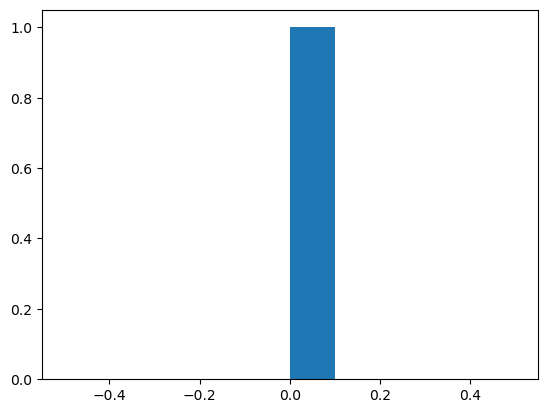

In [53]:
plt.hist(0)

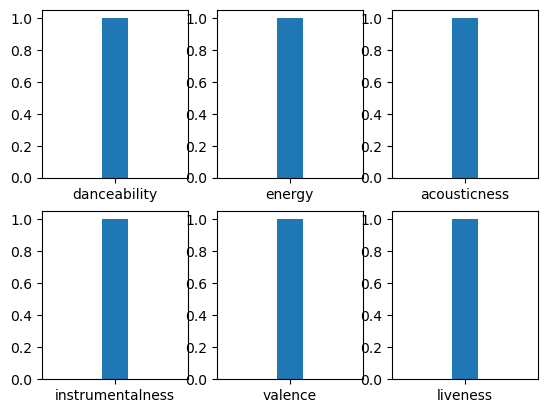

In [54]:
fig1, ax1 = plt.subplots(2, 3)
ax1[0, 0].hist(['danceability'], bins = 5)
ax1[0, 1].hist(['energy'], bins = 5)
ax1[0, 2].hist(['acousticness'], bins = 5)
ax1[1, 0].hist(['instrumentalness'], bins = 5)
ax1[1, 1].hist(['valence'], bins = 5)
ax1[1, 2].hist(['liveness'], bins = 5)


plt.show()